# Customer Segmentation 

The aim of this project is to amplify sales by employing marketing strategies through **customer segmentation**. We will create new features that will facillitate seperating customers into different groups using the **K-means clustering Algorithm**. This segmentation of customers into different groups will allow us to see which groups bring the most or potentially the most profit for the company and will allow us to cater marketing strategies to help attract and retain out customers. This dataset is taken from [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/352/online+retail) and is a dataset which contains information about customers transactions in a clothing shop in the UK.

# Importing Necessary Libraries 

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress 
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import plotly.graph_objects as go

In [144]:
# Configure Seaborn plot background color and use dark grid

sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

## Loading The Dataset

Describing the Dataset:

- InvoiceNo: It is the InvoiceNo of each transaction. Each InvoiceNo can represent numerous items in a single transaction. It is an Object Data Type.

- StockCode: It represents the code for each specific item in the store. It is an Object Data type.

- Description: The name of the Item that was purchased. It is an object data type. It contains quite a few of null rows as 540455 out of
541909 are non-null rows.

- Quantity: It represents the number of items purchased in each transaction. It is an Integer Data Type.

- InvoiceDate: It represents the date and time of when the transaction was made. 

- UnitPrice: It represents the price of each product. It is a float data type.

- CustomerID: It represents the customer ID for each transaction. It is a float data type. We can see that it contains quite a few of null rows as 406829 out of 541909 are non-null rows.

- Country: It is the country of where it was purchased. It is an object data type.

In [145]:
df = pd.read_csv("data/E-Commerce_data.csv", encoding="ISO-8859-1")

In [146]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Summary Statistics

In [148]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [149]:
df.describe(include = "object").T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


We can make a few observations about each column from the data we have above:

* Quantity: 
    - It has an average of around 10 items.
    - We can see that it has a maximum value of 80995 and a minimum value of -80955. The negative value corresponds to cancelled orders.
    - Finally, we can see that 25% of the data is 1 item per transaction, 50% is 3 items per transaction and 75% is 10 items per transaction.

* UnitPrice:
    - We can see the average is around 5£ (pounds).
    - We can see that the maximum UnitPrice is 38970£ (pounds) and the minimum UnitPrice is -11062.06£ (pounds) which shows that there are some errors within the dataset as negative prices does not make sense in real-life transactions.
    - Lastly, we can see that 25% of the data is 1.25£ (pounds), 50% is 2.08£ (pounds) and 75% is 4.13£ (pounds).
    
* CustomerID:
    - There are 406829 non-null entries, indicating that there are a lot of missing values in the dataset for the CustomerID column.
    - Range between 12346 to 18287 which allows us to identify the customers
   
* InvoiceNo: 
    - There are 25900 unique invoices thus telling us there are 25900 unique transactions.
    - The largest InvoiceNo is 573585, which the number of times it appeared is 1114, indicating that there may have been a large transaction.
    
* Description:
    - There are 4223 unique values and we can see that the most frequent item appearing in the transactions is WHITE HANGING HEART T-LIGHT HOLDER which showed 1114 times. 
    - 

* StockCode:
    - We can see that there are 4070 unique items in the store.
    - The StockCode that appears the most frequent is 85123A, which showed up 2313 times.
    
* Country
    - The most frequent country in which the products were purchased is the United Kingdom. It appeared a total of 495478 times.
    - There are 38 unique values in the dataset indicating that there are 38 countries that the shp has expanded too, however, the majority is located in the UK.


## Data Wrangling and Cleaning 

This step will transform the dataset into a clean dataset which includes removing or replacing any missing values, removing any duplicates and any other neccessary data correction methods to ensure that the dataset we will use will be adequate for our data analysis.

In [150]:
missing = df.isnull().sum()
missing_percentage = (missing[missing > 0] / df.shape[0]) * 100
missing_percentage

Description     0.268311
CustomerID     24.926694
dtype: float64

In [151]:
missing_percentage.sort_values(ascending = True, inplace = True)

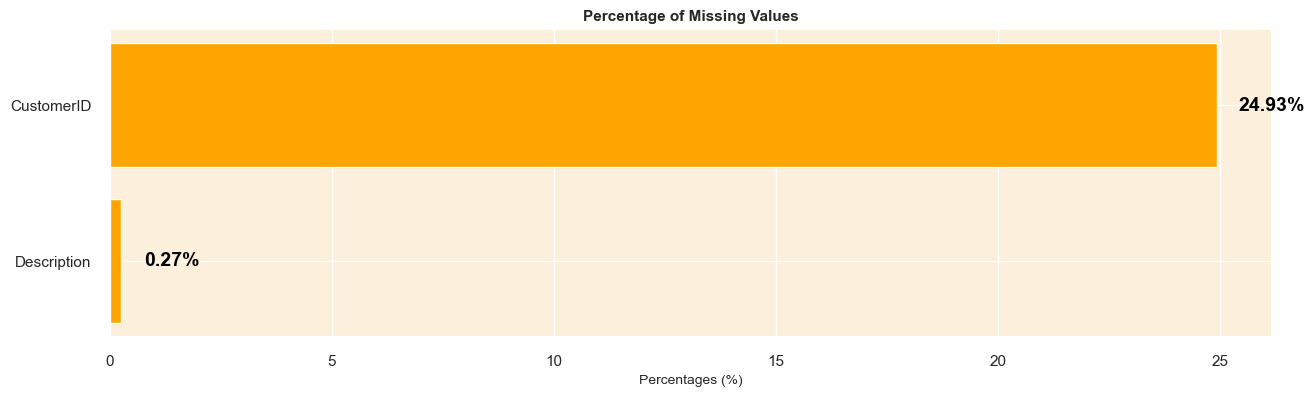

In [152]:
fig, ax = plt.subplots(figsize = (15,4))
ax.barh(missing_percentage.index, missing_percentage, color = "orange")

for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value + 0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=14, color='black')

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=11)
plt.xlabel('Percentages (%)', fontsize=10)
plt.show()

This shows that the percentage of missing values for the CustomerID is very large at approximately 25%. However, since we cannot just replace values of the customerID since each customerID is unique and if we duplicate these values, it might create bias or skewness in our clustering alogrithm. Therefore, it is better to just remove all the values that are missing in CustomerID.

For the Description, we know from our initial analysis that there are some missing values that need to be treated. Since the percentage is very low of which there are no descriptions, we can just remove all missing description rows to remove inconsistencies in our dataset.

In [153]:
df = df.dropna(subset = ["CustomerID", "Description"])

# checking how many null values there 
df.isnull().sum().sum()

0

### Dealing with Duplicated Rows

In this section, we will show how we deal with duplicated rows.

In [154]:
df_duplicates = df[df.duplicated()]

df_duplicates.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom


We will then remove these duplicates to remove any skewness that could affect our clustering.

In [155]:
df.drop_duplicates(inplace = True)
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [156]:
df.shape[0]

401604

In [157]:
# Filter out the rows that start with a "C" in the "InvoiceNo" Column and change it to either Cancelled or Completed. If it starts with a "C"
# then it is Cancelled and vice versa.
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancelled_transactions.describe().drop('CustomerID', axis = 1)

percentage = (len(cancelled_transactions) / df.shape[0]) * 100
percentage

2.209141343213713

We can see that all transactions are negative, thus, showing that all transactions in the cancelled transaction dataframe are cancelled. In addition, we can also see that for the UnitPrice, since, the std value is high at 445, we can tell that a variety of products were brought back or cancelled. Finally, we can also see that around 2.21% of transactions get cancelled.

### StockCode Analysis

In [158]:
unique_stockcodes = df["StockCode"].nunique()
unique_stockcodes

3684

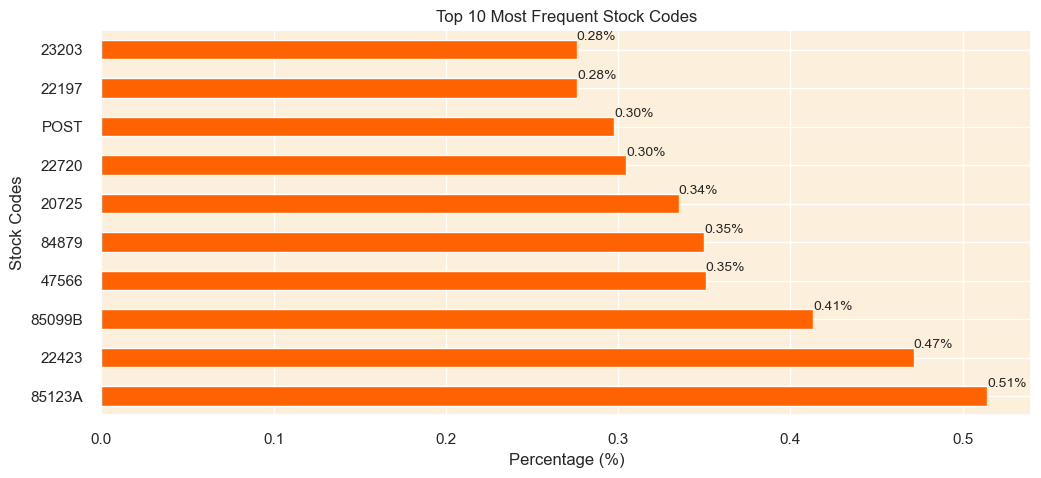

In [159]:
top_10_stockcodes = df['StockCode'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 5))
top_10_stockcodes.plot(kind='barh', color='#ff6200')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_stockcodes):
    plt.text(value , index + 0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage (%)')
plt.ylabel('Stock Codes')
plt.show()

We can see that since there are 3684 unique stock codes, there are a lot of options for customers to choose from, thus, can show us numerous distinct customer groups with their unique preferences of which items they want to purchase.

In addition, we can see that the item with 85123A is the most popular product in the store.

However, we can also observe that usually, there are 5-6 characters in a stock code, however, 1 of the codes is called "POST". These might represent service fees instead of actual transactions made by customers, thus, we could remove these rows as we want our clustering to base only on actual product transactions. Let us try investigate further how many of these service stock codes there are in the dataframe.

In [160]:
unique_stock = df["StockCode"].unique()
number_character_counts_in_stockcodes = pd.Series(unique_stock).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

number_character_counts_in_stockcodes

5    3676
0       7
1       1
dtype: int64

We can see that there are there are 7 stock codes that have 0 number digits and 1 stock code that has 1 number digit. Let's get a closer look to what these stock codes represent.

In [161]:
# Finding the stock codes that have 0 or 1 number digits
anomaly_stockcode = [sc for sc in unique_stock if sum(c.isdigit() for c in str(sc)) in (0, 1)]

for sc in anomaly_stockcode:
    print(sc)

POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


We can see that these are the stock codes that have either 0 digit or 1 digit in their codes. Let's calculate what the percentage is to see if it is insignificant to the total number of stock codes in the dataset.

In [162]:
stock_anomaly_total = (len(anomaly_stockcode)/unique_stockcodes) * 100


print(f"The percentage of Anomalous Stock Codes in the dataset is {stock_anomaly_total:.2f}%")


The percentage of Anomalous Stock Codes in the dataset is 0.22%


We can see that the percentage of Anomalous Stock codes in the dataset is 0.22% which is very negligible, thus, we can just remove it. (only 8 out of 3684 Stock Codes). In addition, these codes names are simply "POST" or "D" which indicates that it may be just extra charges and not item purchases, therefore, it is better if we totally remove it as we do not want these factors affect ur algorithm.

In [163]:
df = df[~df["StockCode"].isin(anomaly_stockcode)]

df["StockCode"].nunique()

3676

In [164]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed


## Feature Engineering

In this section, we will be creating features that will help us create a comprehensive dataset for our clustering system.

Firstly, we will create RFM which is a method used in marketing and customer relationship management (CRM) to analyze and segment customers based on their transactional behavior. Here's a quick description of each component:

1. Recency (R): This refers to how recently a customer has made a purchase or engaged with the business. Customers who have made a purchase more recently are considered more valuable or active.

2. Frequency (F): Frequency measures how often a customer makes purchases or interacts with the business over a specific period. Customers who make frequent purchases are often more loyal and valuable.

3. Monetary Value (M): Monetary value represents the amount of money a customer has spent on purchases within a given timeframe. Customers with higher monetary value contribute more revenue to the business.

#### Recency (R)

We will create a column that describes the last time a customer made a purchase called "Days Since Last Purchase". This is an important feature as it tells us how engaged a customer is to our brand. A lower value of this feature means that the customer was more engaged with the brand while a higher value of this feature means that the customer has less engagement for our brand. By understanding the engagement and how recent a customer made a purchase, businesses can tailor marketing strategies to increase customer engagement.

In [165]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed


In [166]:
# Making InvoiceDate Column into a datetime type
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Extracting only the date from the Column
df["InvoiceDay"] = df["InvoiceDate"].dt.date

# Finding the most recent date for each customer
customer_most_recent = df.groupby("CustomerID")["InvoiceDay"].max().reset_index()

# Getting the Most Recent Purchase Date
most_recent = df["InvoiceDay"].max()

# Converting both the InvoiceDay and most recent date into datetime type so they can be subtracted together
customer_most_recent["InvoiceDay"] = pd.to_datetime(customer_most_recent["InvoiceDay"])
most_recent_date = pd.to_datetime(most_recent)

# Subtracting the most recent day with each customer's last purchase to find "Days Since Last Purchase"
customer_most_recent["Days_Since_Last_Purchase"] = (most_recent_date - customer_most_recent["InvoiceDay"]).dt.days

# Removing InvoiceDay column
customer_most_recent.drop(columns = ["InvoiceDay"], inplace = True)

print(customer_most_recent.head())

   CustomerID  Days_Since_Last_Purchase
0     12346.0                       325
1     12347.0                         2
2     12348.0                        75
3     12349.0                        18
4     12350.0                       310


Now, we can see each customer's last time they made a purchase from the business.

#### Frequency (F)

Next, we will create a column for the total number of transactions a customer has made named "Total Transactions" and we will create and create a column about how many products each customer has purchased as well called "Total Products Purchased". A higher value of both these features indicate a higher engagement of the customer and the business. In addition, total products purchased gives insights into customers behaviour.

In [167]:
# Calculate the total number of transactions for each customer
total_transactions = df.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()
total_transactions.rename(columns = {"InvoiceNo" : "Total Transactions"}, inplace = True)

# Calculate the total number of products purchased for each customer
total_products_purchased = df.groupby("CustomerID")["Quantity"].sum().reset_index()
total_products_purchased.rename(columns = {"Quantity" : "Total Products Purchased"}, inplace = True)

# Merge these two datasets with the customer_most_recent dataset 
customer_most_recent = pd.merge(customer_most_recent, total_transactions, on = "CustomerID")
customer_most_recent = pd.merge(customer_most_recent, total_products_purchased, on = "CustomerID")

# View the Dataset
customer_most_recent.head()

,CustomerID,Days_Since_Last_Purchase,Total Transactions,Total Products Purchased
0,12346.0,325,2,0
1,12347.0,2,7,2458
2,12348.0,75,4,2332
3,12349.0,18,1,630
4,12350.0,310,1,196


#### Monetary (M)

Finally, we will create a column to observe how much money each individual has spent on purchasing products from the company. We will name this column "Total Spenditure". A higher value meaning higher customer engagement with the brand

We will also create a column named "Average Transaction Cost", which is the Total Spenditure divided by Total Transactions for each customer. It is the average of how much a customer spends on the items they purchase. This column gives insights on the spending behaviour of each customer and we can tailor marketing strategies based on the characteristics of these consumers.

In [168]:
# Calculate Total Spenditure for each customer
df["Total Spenditure"] = df["UnitPrice"] * df["Quantity"]
total_spenditure = df.groupby("CustomerID")["Total Spenditure"].sum().reset_index()

# Calculate Average Spenditure for each customer
average_transaction_cost = pd.merge(total_spenditure, total_transactions, on = "CustomerID")
average_transaction_cost["Average Transaction Cost"] = average_transaction_cost["Total Spenditure"] / average_transaction_cost["Total Transactions"]
average_transaction_cost.drop(columns = ["Total Transactions"], inplace = True)

# Merge and View the dataset
customer_most_recent = pd.merge(customer_most_recent, average_transaction_cost, on = "CustomerID")
customer_most_recent.head()


,CustomerID,Days_Since_Last_Purchase,Total Transactions,Total Products Purchased,Total Spenditure,Average Transaction Cost
0,12346.0,325,2,0,0.00,0.000000
1,12347.0,2,7,2458,4310.00,615.714286
2,12348.0,75,4,2332,1437.24,359.310000
3,12349.0,18,1,630,1457.55,1457.550000
4,12350.0,310,1,196,294.40,294.400000


### Product Diversity

In this section, we will create a column that describes the number of unique items purchased by a customer. Observing the unique number of products purchased by a customer helps the busisness understand and craft marketing strategies that tailor to each customer groups. A higher number of unique products purchased means the customer purchased a wide range of products, while a low value means that the customer might be more specific in what they like from the company's products. This feature will help us identify customer's buying diversity and we can create a personalized marketing strategy towards their specific subgroup. We will name this column: "No of Unique Products Purchased".

In [169]:
# Make the unique products column
unqiue_products = df.groupby("CustomerID")["StockCode"].nunique().reset_index()
unqiue_products.rename(columns = {"StockCode" : "No Of Unique Products Purchased"}, inplace = True)

# Merge the dataframe together with customer_most_recent and view it
customer_most_recent = pd.merge(customer_most_recent, unqiue_products, on = "CustomerID")
customer_most_recent.head()

,CustomerID,Days_Since_Last_Purchase,Total Transactions,Total Products Purchased,Total Spenditure,Average Transaction Cost,No Of Unique Products Purchased
0,12346.0,325,2,0,0.00,0.000000,1
1,12347.0,2,7,2458,4310.00,615.714286,103
2,12348.0,75,4,2332,1437.24,359.310000,21
3,12349.0,18,1,630,1457.55,1457.550000,72
4,12350.0,310,1,196,294.40,294.400000,16


### Behavioural Features

For this part, our goal is to understand a customer's shopping patterns and behaviours. These features will give us an insight to when they like to shop, which can give us information to tailor a personalized marketing strategy for each customer group.

For the first column, **Average day between Shopping Days** which signnifies how often they shop from the business. A lower score would present higher customer engagement and vice versa. This can be also used to predict when a customer might come back and purchase another item.

For the second column, **Favorite Shopping Day** which signifies which day of the week they most often make a purchase from the business. This can be useful to predict which day might be the busiest and which customer groups might visit the shop which can be used to tailor personalized marketing strategies for each customer segment.

For the third column, **Favorite Shopping Hour** which signifies which hour of the day they make purchases at from the business. This can be useful to predict which hour might be the busiest for each customer group and we can tailor campaigns and promotions depending on the time.

In [170]:
# Getting Transaction Date Details of Day and Hour
df["Day_of_Week"] = df["InvoiceDate"].dt.dayofweek
df["Hour_of_Day"] = df["InvoiceDate"].dt.hour

# Make the "Average Day Between Shopping Days" Column
days_between_shopping = df.groupby("CustomerID")["InvoiceDay"].apply(lambda x : (x.diff().dropna()))
days_between_shopping = days_between_shopping.apply(lambda x : x.days)

average_between_shopping = days_between_shopping.groupby("CustomerID").mean().reset_index()
average_between_shopping.rename(columns = {"InvoiceDay" : "Average day between Shopping Days"}, inplace = True)

# Make the "Favorite Shopping Days" column
fav_day = df.groupby(["CustomerID","Day_of_Week"]).size().reset_index(name = "Count")
fav_day = fav_day.loc[fav_day.groupby("CustomerID")["Count"].idxmax()]
fav_day = fav_day[["CustomerID", "Day_of_Week"]]

# Make the "Favorite Shopping Hour" column
fav_hour = df.groupby(["CustomerID","Hour_of_Day"]).size().reset_index(name = "Count")
fav_hour = fav_hour.loc[fav_hour.groupby("CustomerID")["Count"].idxmax()]
fav_hour = fav_hour[["CustomerID", "Hour_of_Day"]]

# Merge these 3 datasets with the customer_most_recent and view it
customer_most_recent = pd.merge(customer_most_recent, average_between_shopping, on = "CustomerID")
customer_most_recent = pd.merge(customer_most_recent, fav_day, on = "CustomerID")
customer_most_recent = pd.merge(customer_most_recent, fav_hour, on = "CustomerID")

customer_most_recent.head(5)

,CustomerID,Days_Since_Last_Purchase,Total Transactions,Total Products Purchased,Total Spenditure,Average Transaction Cost,No Of Unique Products Purchased,Average day between Shopping Days,Day_of_Week,Hour_of_Day
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16


### Geographical Features

In this section, we will identify which country each customer did the transaction from. This is useful as it can help us understand a region's specific popular items and such. Different regions have varying preferences and thus this column should give insight into helping better manage inventory space and aid in logistics as well. Our first Step is to identify how many countries there are:

In [171]:
# Countries Available
df["Country"].value_counts(normalize = True).head(5)

United Kingdom    0.890968
Germany           0.022720
France            0.020396
EIRE              0.018439
Spain             0.006162
Name: Country, dtype: float64

We can observe that approxiametly **89%** of the data is from the UK, thus we can create a binary system that signifies is the transaction from the UK or not. This can help us as we do not want a feature space with high dimensionality as we are going to use K-means algorithm which is sensitive to such factors.

Methodology:

1. Get the Total Number of Transactions per country for each customer.

2. Get the highest number of transactions from that country from each customer. We take the maximum from each customer as we want the countries the customer shop most often from.

3. Create a Binary Column indicating is that transaction from the UK or not.

4. Merge the dataset with the customer_most_recent dataset.

In [172]:
# Groupby CustomerID and Country to get the number of transactions per country for each customer
transaction_number = df.groupby(["CustomerID","Country"]).size().reset_index(name = "Number_of_Transactions")

# Get the Country that has the highest number of transactions for each Customer 
transaction_number = transaction_number.sort_values("Number_of_Transactions", ascending = False).drop_duplicates("CustomerID")
transaction_number

# Create a Binary Column Indicating is it from the UK or not
transaction_number["is_UK"] = transaction_number["Country"].apply(lambda x : 1 if x == "United Kingdom" else 0)
transaction_number = transaction_number[["CustomerID","is_UK"]]

# Merge and view the dataset
customer_most_recent = pd.merge(customer_most_recent, transaction_number, on = "CustomerID")
customer_most_recent.head()

,CustomerID,Days_Since_Last_Purchase,Total Transactions,Total Products Purchased,Total Spenditure,Average Transaction Cost,No Of Unique Products Purchased,Average day between Shopping Days,Day_of_Week,Hour_of_Day,is_UK
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0


In [173]:
customer_most_recent["is_UK"].value_counts()

1    3869
0     416
Name: is_UK, dtype: int64

### Cancellation Insights

In this section, we will explore more about the cancellation patterns of customers to gain insights on why and what makes a customers cancel their purchase, ultimately, to better our customer segmentation model.

- For the first column, it will be "Cancellation Frequency" that represents the total number of transactions a single customer has cancelled. This column could helps us understand what makes a customer cancel their transaction and aid us in tailoring marketing strategies to decrease the cancelling transactions.

- For the second column, it will be "Cancellation Rate" that represents the proportion of transactions cancelled over their total transactions. This column helps us understand if a customer is satisfied or not with the company's product as a high cancellation rate would result in a customer dissatisfied with our products.

In [174]:
# Calculate the number of cancelled transactions per customer
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancelled_frequency = cancelled_transactions.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()
cancelled_frequency.rename(columns={"InvoiceNo": "Cancellation Frequency"}, inplace=True)

# Calculate the total number of transactions per Customer
total_transactions = df.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()

# Merge the Cancellation Frequency Column into customer_most_recent
customer_most_recent = pd.merge(customer_most_recent, cancelled_frequency, on="CustomerID", how = "left")

# Fill NaN with 0 in the Cancellation Frequency
customer_most_recent["Cancellation Frequency"] = customer_most_recent["Cancellation Frequency"].fillna(0)

# Calculate the Cancellation Rate per Customer
customer_most_recent["Cancellation Rate"] = customer_most_recent["Cancellation Frequency"] / total_transactions["InvoiceNo"]

# View the dataset
customer_most_recent.head()

,CustomerID,Days_Since_Last_Purchase,Total Transactions,Total Products Purchased,Total Spenditure,Average Transaction Cost,No Of Unique Products Purchased,Average day between Shopping Days,Day_of_Week,Hour_of_Day,is_UK,Cancellation Frequency,Cancellation Rate
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.0
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0


### Trends in Different Seasons

In this section, we will explore the differnt customer behaviours and spending habits depending on the seasons, which can help us gain insights to tailor specific marketing strategies and enchancing our customer segmentation model. 

- For the first column, it will be "Monthly_Spenditure_Mean" which represents the average amount of money spent on a monthly basis for each customer. This will show how enganged the customer is with out product as the higher it is, the more engaged they are with our products.

- For the second column, it will be "Monthly_Spenditure_std" which represents the standard deviation across all months they spent on the products. A higher spenditure would indicate that the customer has fluncuating monthly spenditure, maybe had some months where they have a high spontaneous high spenditure. Understanding these variabilities would help in tailoring a makreting strategy and can offer discounts and such to that customer.

- For the third column, it will be "Spending Trends" and it represents the spending trends of a customer over time. We calculate this by the slope of the best fitted line using linregress function. A positive value means that the customer has high satisfaction thus going back to our stores increasing customer loyalty. A negative value would mean the opposite. A near-zero spending trend would mean the customer barely purchases products from our store. Understanding these trends would help in focusing on which customers have high loyalty which means high potential profit and also understanding on why customers are spending less and less so we can tailor specific marketing strategies to increase their customer loyalty.

In [175]:
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month

# Calculate Monthly Spenditure Mean and std
monthly_spenditure = df.groupby(["CustomerID", "Year", "Month"])["Total Spenditure"].sum().reset_index()
seasonal_data = monthly_spenditure.groupby("CustomerID")["Total Spenditure"].agg(['mean','std']).reset_index()

seasonal_data.rename(columns = {"mean" : "Monthly_Spenditure_Mean", "std" : "Monthly_Spenditure_std"}, inplace = True)

# Replcae NaN values with 0, as 0 means that no variability as customer only purhcased in a single month 
seasonal_data["Monthly_Spenditure_std"] = seasonal_data["Monthly_Spenditure_std"].fillna(0)

# Calulating trends in Spending, we will use linregress to calulcate the slope of each customer's spending habit over time.
def calc_trends(spending_data):
    if len(spending_data) > 1:
        x = np.arange(len(spending_data))
        slope, Intercept, rvalue, pvalue, std_error = linregress(x, spending_data)
        return slope
    else: 
        return 0
    
# Apply the function onto the dataset to calculate spending trends
spending_trends = monthly_spenditure.groupby("CustomerID")["Total Spenditure"].apply(calc_trends).reset_index()
spending_trends.rename(columns = {"Total Spenditure" : "Spending Trends"}, inplace = True)


# Merge and view the dataset
customer_most_recent = pd.merge(customer_most_recent, seasonal_data, on= "CustomerID")
customer_most_recent = pd.merge(customer_most_recent, spending_trends, on= "CustomerID")
customer_most_recent.head(4)

,CustomerID,Days_Since_Last_Purchase,Total Transactions,Total Products Purchased,Total Spenditure,Average Transaction Cost,No Of Unique Products Purchased,Average day between Shopping Days,Day_of_Week,Hour_of_Day,is_UK,Cancellation Frequency,Cancellation Rate,Monthly_Spenditure_Mean,Monthly_Spenditure_std,Spending Trends
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5,0.000000,0.000000,0.000000
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0,615.714286,341.070789,4.486071
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.0,359.310000,203.875689,-100.884000
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0,1457.550000,0.000000,0.000000


### Outlier Detection

In this section, we will detect outliers using the Isolation Forest Algorithm as it works well with multi-dimensional datasets and is computaionally efficient.

In [176]:
# Initializing an Isolation Forest Model using contamination 0.1
model_IF = IsolationForest(contamination = 0.05, random_state = 123)

# Fitting the model
customer_most_recent["Outlier Scores"] = model_IF.fit_predict(customer_most_recent.iloc[:,1:].to_numpy())
customer_most_recent["Is_Outlier"] = [1 if x == -1 else 0 for x in customer_most_recent["Outlier Scores"]]

# Viewing the dataset
customer_most_recent.head()

,CustomerID,Days_Since_Last_Purchase,Total Transactions,Total Products Purchased,Total Spenditure,Average Transaction Cost,No Of Unique Products Purchased,Average day between Shopping Days,Day_of_Week,Hour_of_Day,is_UK,Cancellation Frequency,Cancellation Rate,Monthly_Spenditure_Mean,Monthly_Spenditure_std,Spending Trends,Outlier Scores,Is_Outlier
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5,0.000000,0.000000,0.000000,1,0
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0,615.714286,341.070789,4.486071,1,0
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.0,359.310000,203.875689,-100.884000,1,0
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0,1457.550000,0.000000,0.000000,1,0
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0,294.400000,0.000000,0.000000,1,0


In [177]:
# Observing number of inliers and outliers
customer_most_recent["Is_Outlier"].value_counts(normalize = True) * 100

0    94.982497
1     5.017503
Name: Is_Outlier, dtype: float64

We can see about 5% of our data are outliers, thus it is not a large amount of data therefore we can remove it and it will not affect our analysis that much.

In [178]:
# Getting Customer Outlier Dataset
customer_outliers = customer_most_recent[customer_most_recent["Is_Outlier"] == 1]

# Getting the Customer inliers Dataset
customer_cleaned = customer_most_recent[customer_most_recent["Is_Outlier"] == 0]

# Dropping the Columns of Outliers
customer_cleaned = customer_cleaned.drop(columns = ["Is_Outlier", "Outlier Scores"])

# View the dataset
customer_cleaned.head()

,CustomerID,Days_Since_Last_Purchase,Total Transactions,Total Products Purchased,Total Spenditure,Average Transaction Cost,No Of Unique Products Purchased,Average day between Shopping Days,Day_of_Week,Hour_of_Day,is_UK,Cancellation Frequency,Cancellation Rate,Monthly_Spenditure_Mean,Monthly_Spenditure_std,Spending Trends
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5,0.000000,0.000000,0.000000
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0,615.714286,341.070789,4.486071
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.0,359.310000,203.875689,-100.884000
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0,1457.550000,0.000000,0.000000
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0,294.400000,0.000000,0.000000


In [179]:
customer_cleaned.shape[0]

4070

### Correlation Analysis

Plot a heat map to identify features that are highly correlated to avoid multicollinearity, so the alogirthm can actually learn patterns in the data. After this, we can use PCA to reduce the effects of multicollinearity and transform the dataset into a set of uncorrelated features. This helps in getting a more stable cluster groups during K-means Clustering.

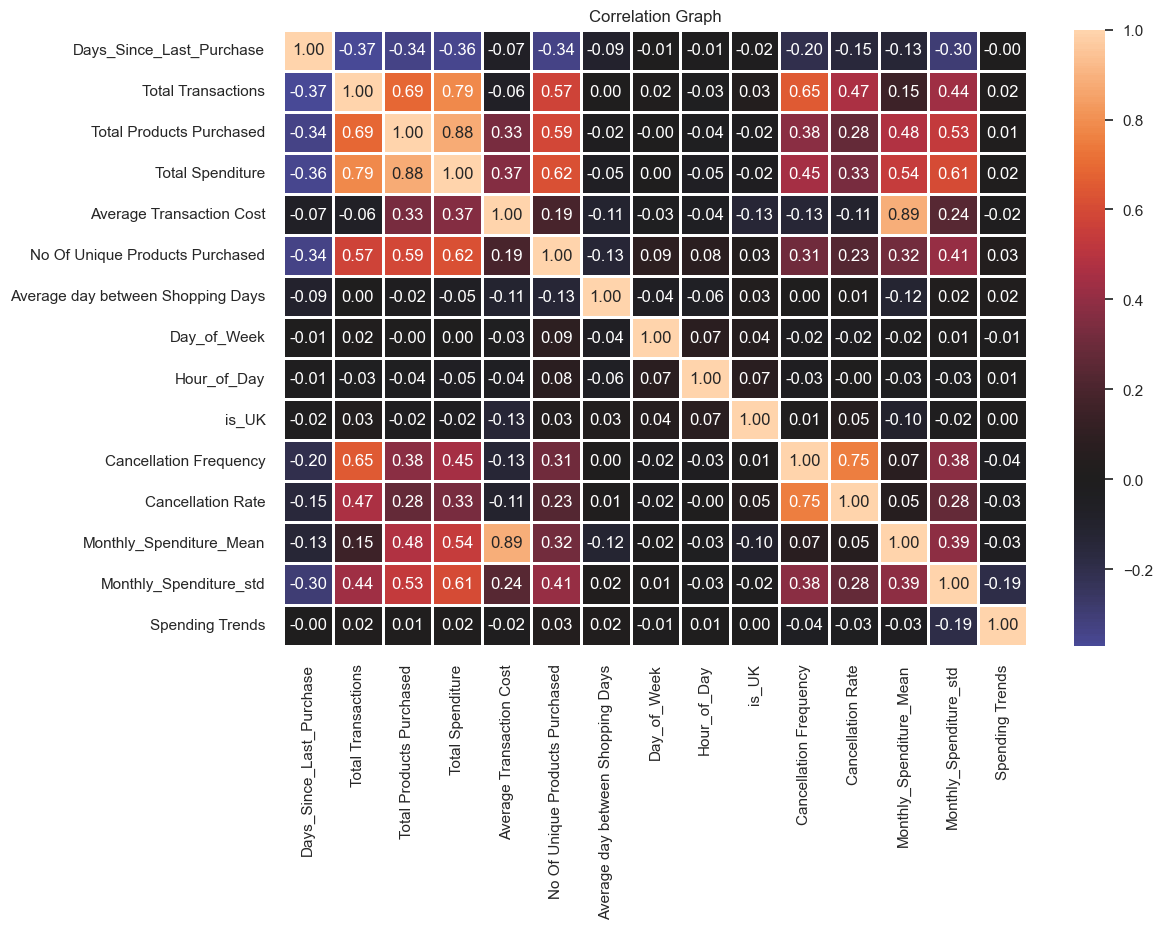

In [180]:
sns.set_style("whitegrid")

# Caculating correlation between each variables 
corr = customer_cleaned.drop(columns = ["CustomerID"]).corr()

# Plotting the heat map
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True, center = 0, fmt = '.2f', linewidths = 2)
plt.title("Correlation Graph", fontsize = 12)
plt.show()

We can see that the following are highly correlated:
    
    - Total_Spenditure and Total_Products_Purchased
    
    - Total_Spenditure and Total_Transactions
    
    - Total_Products_Purchased and Total_Transactions
    
    - Average_Transaction_Cost and Monthly_Speniture_Mean
    
    - Cancellation Frequency and Cancellation Rate

### Feature Scaling and PCA

Standardize the data first, excluding these columns (CustomerID, Day_of_Week, Hour_of_Day and is_UK)

In [181]:
# Initialize the Standard Scaler
scaler = StandardScaler()

# Columns to exclude
columns_to_exclude = ["CustomerID", "Day_of_Week", "Hour_of_Day", "is_UK"]

# Copy the dataset and exclude the columns
columns_to_scale = customer_cleaned.columns.difference(columns_to_exclude)
customer_scaled = customer_cleaned.copy()

# Apply Scaling to Columns
customer_scaled[columns_to_scale] = scaler.fit_transform(customer_scaled[columns_to_scale])

# View the dataset
customer_scaled.head()

,CustomerID,Days_Since_Last_Purchase,Total Transactions,Total Products Purchased,Total Spenditure,Average Transaction Cost,No Of Unique Products Purchased,Average day between Shopping Days,Day_of_Week,Hour_of_Day,is_UK,Cancellation Frequency,Cancellation Rate,Monthly_Spenditure_Mean,Monthly_Spenditure_std,Spending Trends
0,12346.0,2.338748,-0.474750,-0.797172,-0.853983,-1.308483,-0.900429,-0.308910,1,10,1,0.412124,0.377847,-1.328300,-0.721908,0.092159
1,12347.0,-0.906099,0.710087,2.183989,2.543937,1.520961,0.799399,-0.125237,1,14,0,-0.539831,-0.430177,0.996057,1.313306,0.118321
2,12348.0,-0.172744,-0.000815,2.031171,0.279109,0.342685,-0.567129,0.682476,3,19,0,-0.539831,-0.430177,0.028116,0.494645,-0.496178
3,12349.0,-0.745364,-0.711717,-0.033083,0.295121,5.389520,0.282785,-0.308910,0,9,0,-0.539831,-0.430177,4.174036,-0.721908,0.092159
4,12350.0,2.188058,-0.711717,-0.559456,-0.621884,0.044398,-0.650454,-0.308910,2,16,0,-0.539831,-0.430177,-0.216923,-0.721908,0.092159


Once the data is standardized, we are going to apply PCA to it to capture linear relationships despite the multicollinearity of the data. It allows us to reduce the number of features in our dataset to make our clustering algorithm for precise are reliable. 

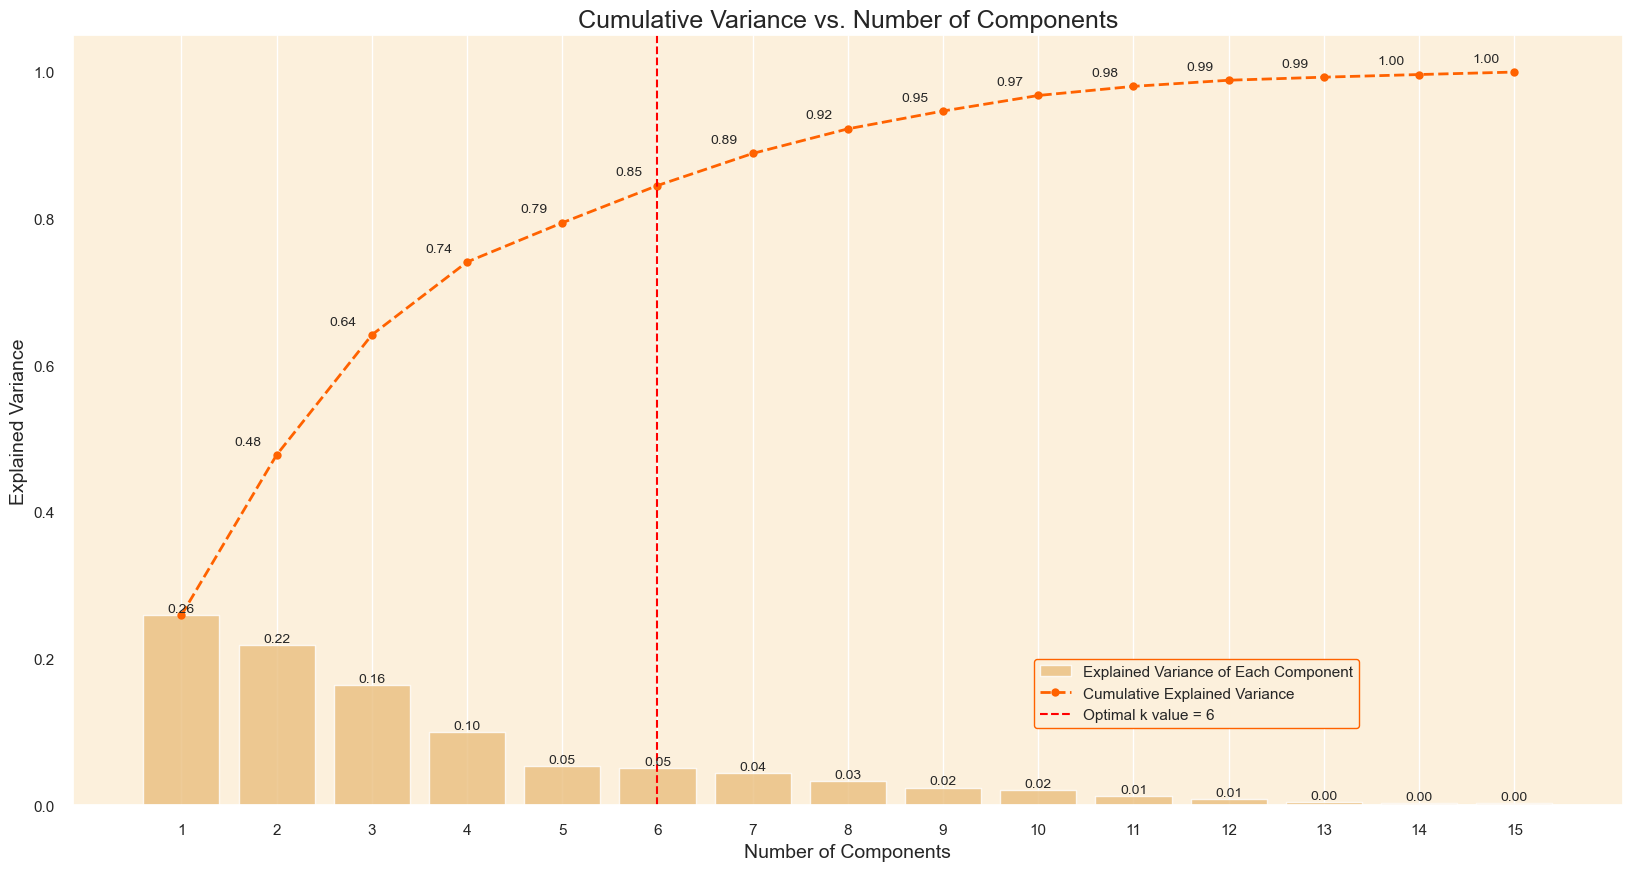

In [182]:
# Setting CustomerID as the index column
customer_scaled.set_index('CustomerID', inplace=True)

# Apply PCA
pca = PCA().fit(customer_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

optimal_k = 6

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}') 

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='#ff6200')  

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

It shows that 6 is the optimal k value as it is the **"elbow point"** of the curve.

In [183]:
pca = PCA(n_components=6)

customer_pca = pca.fit_transform(customer_scaled)

customer_pca = pd.DataFrame(customer_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

customer_pca.index = customer_scaled.index

customer_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
12346.0,-2.372215,-2.672049,-1.011769,-1.651144,-0.991240,-1.284400
12347.0,0.693041,3.439756,-1.936302,2.006093,0.842007,0.464848
12348.0,6.211572,1.576412,-0.702094,0.778313,0.211377,1.304817
12349.0,-4.170357,0.927843,-2.164444,5.795076,-0.426019,-0.378314
12350.0,3.564298,-1.580859,-1.034927,0.584214,-0.728654,-0.871641


### K-Means Clustering

We will use K-means clustering algorithm and determine the optimal number of clusters using the Elbow method.

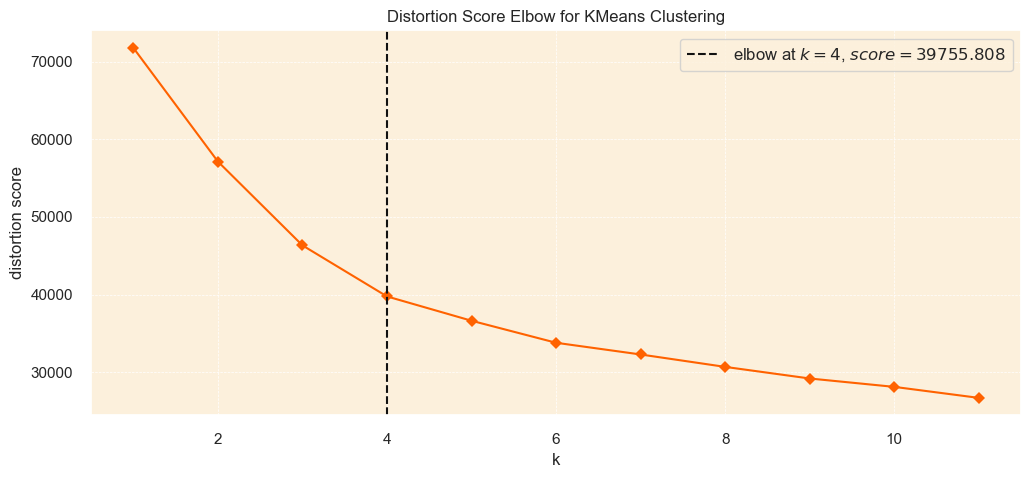

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [184]:
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')
sns.set_palette(['#ff6200'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=123)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Use KElbowVisualizer to find the optimal number of clusters
visualizer = KElbowVisualizer(km, k=(1,12), timings=False, random_state = 123)

# Fit the data to the visualizer
visualizer.fit(customer_pca)

# Customize the plot
visualizer.ax.grid(True, which='both', linestyle='--', linewidth=0.5)
visualizer.show()

We can see now that the the optimal k value for out K-means Clustering Algorithm is **k = 4**, by using the Elbow method.

In [185]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", n_init = 10, max_iter = 100, random_state = 123)

kmeans.fit(customer_pca)


cluster_labels = kmeans.labels_


# Append the new cluster labels back to the original dataset
customer_cleaned['cluster'] = cluster_labels

# Append the new cluster labels to the PCA version of the dataset
customer_pca['cluster'] = cluster_labels

customer_cleaned.head()

,CustomerID,Days_Since_Last_Purchase,Total Transactions,Total Products Purchased,Total Spenditure,Average Transaction Cost,No Of Unique Products Purchased,Average day between Shopping Days,Day_of_Week,Hour_of_Day,is_UK,Cancellation Frequency,Cancellation Rate,Monthly_Spenditure_Mean,Monthly_Spenditure_std,Spending Trends,cluster
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5,0.000000,0.000000,0.000000,0
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0,615.714286,341.070789,4.486071,3
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.0,359.310000,203.875689,-100.884000,2
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0,1457.550000,0.000000,0.000000,0
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0,294.400000,0.000000,0.000000,2


### Clustering Evaluation 

After determining the optimal number of clusters, we move on to our evaluation of our clusters. First, we are going to show a 3D visualization of the top 3 PCs and we will give a cluster distribution. We are using the PCA version of the dataset as this is the dataset used to fit into the K-means algorithm, thus it is more of an accurate representation of our the significant patterns found that formed the clusters.

#### 3D-Visualization

In [186]:
colors = ['#e8000b', '#1ac938', '#023eff', '#ff7f0e']

# Create seperate data frames for each cluster
cluster_0 = customer_pca[customer_pca['cluster'] == 0]
cluster_1 = customer_pca[customer_pca['cluster'] == 1]
cluster_2 = customer_pca[customer_pca['cluster'] == 2]
cluster_3 = customer_pca[customer_pca['cluster'] == 3]

# Create a 3D plot
fig = go.Figure()

fig.add_trace(go.Scatter3d(x = cluster_0["PC1"], y = cluster_0['PC2'], z = cluster_0['PC3'],
mode = "markers", marker = dict(color = colors[0], size = 5, opacity = 0.5), name = "Cluster 0"))

fig.add_trace(go.Scatter3d(x = cluster_1["PC1"], y = cluster_1['PC2'], z = cluster_1['PC3'],
mode = "markers", marker = dict(color = colors[1], size = 5, opacity = 0.5), name = "Cluster 1"))

fig.add_trace(go.Scatter3d(x = cluster_2["PC1"], y = cluster_2['PC2'], z = cluster_2['PC3'],
mode = "markers", marker = dict(color = colors[2], size = 5, opacity = 0.5), name = "Cluster 2"))

fig.add_trace(go.Scatter3d(x = cluster_3["PC1"], y = cluster_3['PC2'], z = cluster_3['PC3'],
mode = "markers", marker = dict(color = colors[3], size = 5, opacity = 0.5), name = "Cluster 3"))

fig.update_layout(title = dict(text = "3D Visualization of PCA for the Customer Clusters", x = 0.5),
scene = dict(xaxis = dict(backgroundcolor = "#fcf0dc", gridcolor = 'white', title = 'PC1'),
        yaxis = dict(backgroundcolor = "#fcf0dc", gridcolor = 'white', title = 'PC2'),
        zaxis = dict(backgroundcolor = "#fcf0dc", gridcolor = 'white', title = 'PC3'),
    ),

    width = 900,
    height = 800
)

fig.show()


#### Cluster Distribution

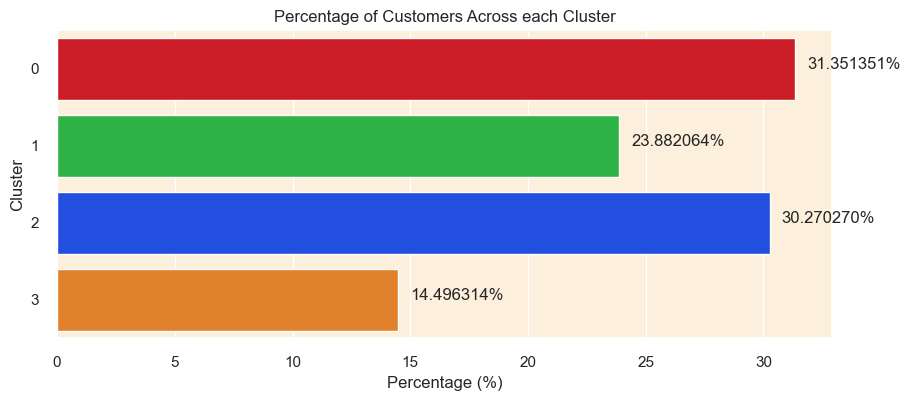

In [187]:
cluster_percentage = (customer_pca["cluster"].value_counts(normalize = True) * 100).reset_index()
cluster_percentage.columns = ["Cluster", "Percentage"]
cluster_percentage.sort_values(by = "Cluster", inplace = True)

plt.figure(figsize = (10,4))
sns.barplot(x = "Percentage", y = "Cluster", data = cluster_percentage, orient = "h", palette = colors)

for index, value in enumerate(cluster_percentage["Percentage"]) :
    plt.text(value + 0.5, index, f"{value:2f}%")

plt.title("Percentage of Customers Across each Cluster")
plt.xlabel("Percentage (%)")

plt.show()

We can see from the graph that the percentage is fairly distributed to cluster 0 and 2, at around 30% respectively. This implies that our clustering was sucessful in terms of reducing noise and clustering customers based on their distinct features, offering business insights to the company. In addition, all clusters have pretty significant percentages of individuals, thus showing that they are all relevant to our findings.

#### Radar Chart

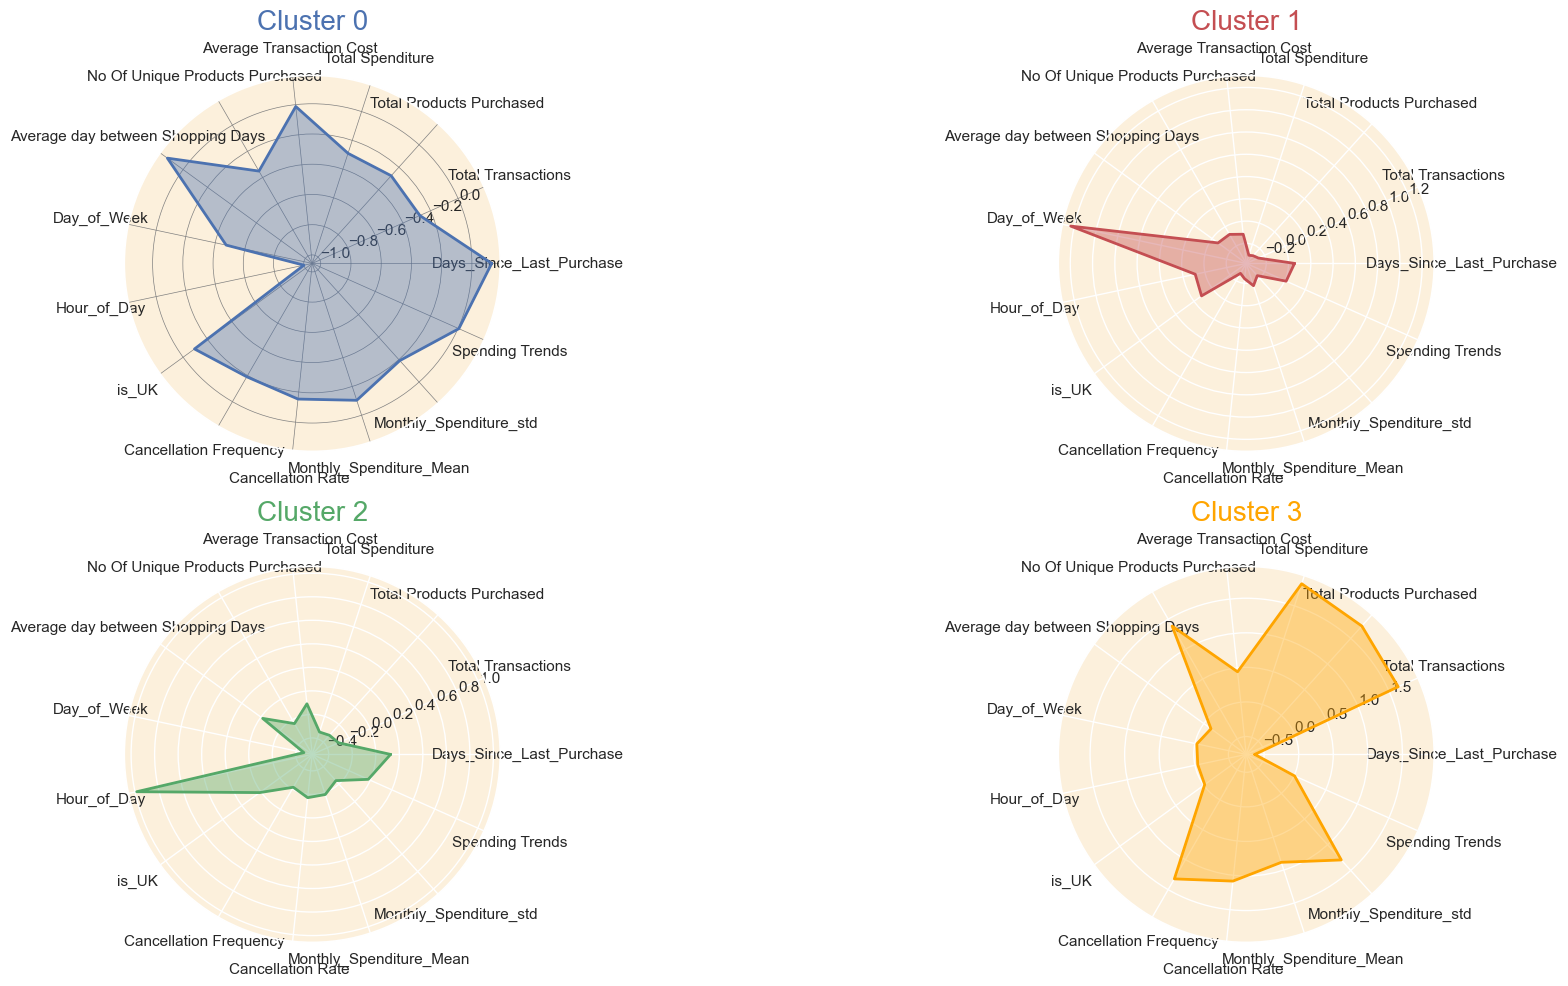

In [198]:
# Set "CustomerID" to the index first
df_customer = customer_cleaned.set_index("CustomerID")

# Scale the data
scaled = StandardScaler()
df_scaled = scaler.fit_transform(df_customer.drop(columns = ['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_scaled = pd.DataFrame(df_scaled, columns = df_customer.columns[:-1], index = df_customer.index)
df_scaled['cluster'] = df_customer['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_scaled.groupby('cluster').mean()

def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color = color, alpha = 0.4)
    ax.plot(angles, data, color = color, linewidth = 2, linestyle = 'solid')
    # Add a title
    ax.set_title(f'Cluster {cluster}', size = 20, color = color, y = 1.1)

labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

angles = np.linspace(0, 2* np.pi, num_vars, endpoint = False).tolist()

labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize = (20, 10), subplot_kw = dict(polar = True), nrows=2, ncols=2)

colors = ["b", "r", "g", "orange"]

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  
    create_radar_chart(ax.flat[i], angles, data, color, i)

# Set labels for the radar charts
for axis in ax.flat:
    axis.set_xticks(angles[:-1])
    axis.set_xticklabels(labels[:-1])

# Add a grid
ax.flat[0].grid(color = "grey", linewidth = 0.5)



# Display the plot
plt.tight_layout()
plt.show()

### 🔵 Cluster 0 (Customers with high spending values and constant spending trends throughout the year)
- 💵 Customers in this cluster tend to spend a high amount and their transactions seem frequent as indicated by Days_Since_Last_Purchase and Spending_Trends columns.
- 🛍️ Customers in this group also purchase a moderate amount of the company's products, which shows our selection suits their preferences (indicated by total_products_purchased).
- 📅 This customer group has a large gap between average days between shopping days, showing they are infrequent big spenders.
- 🔄 The cancellation frequency and rate show a moderate value as well, indicating that sometimes these customers return products they are unsatisfied with.

### 🔴 Cluster 1 (Customers who tend to shop on the weekends)
- 💵 Customers in this cluster tend to spend a low amount with a low number of transactions and total products purchased.
- 📅 They have a high tendency to go shopping on weekends as shown by the Day_Of_Week column.
- 👍 They have a low cancellation rate and frequency, thus showing they are satisfied with their purchases.
- 💳 They have a low spending trend and monthly expenditure, indicating that they do not shop a lot of our products.

### 🟢 Cluster 2 (Late night shoppers)
- 💵 Customers in this cluster have a low amount of spending but higher than cluster 1, however, they also have a low number of transactions and products purchased.
- 👍 They have a low cancellation rate and frequency, thus showing they are satisfied with their purchases.
- 🌙 These customers tend to shop at very late hours, indicating that they may shop after work or their studies.
- 💳 They have a low spending trend and monthly expenditure, showing they do not shop a lot of our products.

### 🟠 Cluster 3 (High spenders with a wide variety of products purchased but high cancellation rates)
- 💵 Customers in this cluster tend to spend a high amount while purchasing a very wide variety of our products.
- 🔄 They have a high spending rate but also a high cancellation frequency and a moderate cancellation rate.
- 📅 These customers tend to come back often as shown by the low days_since_last_purchase value.
- 🌞 These customers tend to shop very early in the day as well.
- 📉 Although they have a very high spending rate, their spending trends do not seem to be very high, indicating that their spending habits with the company might decrease over time.
- 📊 Their monthly spending has very high variability, thus showing they are a harder-to-predict cluster than the others.